In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import reber as reb
import RNNv
np.random.seed(10)

This notebook reproduce the experiment presented in *link* (part III).    
__Please note:__ Due to randomicity figures might not be exactly the same as in the paper but the conclusions are.

# Regular Reber's grammar  
This experiment was presented in the original LSTM paper: "Long Short-Term Memory", Hochreiter and Schmidhuber.   
## Reber's grammar
The following code present how to use the reber module.     
It produces Reber's strings and transforms them into basis vectors' sequences.

In [7]:
r = reb.get_reber()
print(r)
reb.reber_to_seq(r)

BPVPXTVVE


[array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.]),
 array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.]),
 array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.]),
 array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.])]

## Dataset generation
We generate a dataset in the classical ways for reccurent nets,   
an example of the dataset is constitutes by two sequences.   
The goal is to predict the ith entry of the second sequence when the net   
is given the ith entry of the first one.    
We print dataset[0] to give an example.

In [8]:
DATASET_SIZE = 256
dataset = []
for d in range(DATASET_SIZE):
    reber_str = reb.get_reber()
    dataset.append((reber_str, reb.reber_to_seq(reber_str)[:-1], reb.reber_to_seq(reber_str)[1:]))
dataset[0]

('BTXXTVVE',
 [array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.]),
  array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.])],
 [array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.]),
  array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.])])

# Vanilla RNNs
## Model Definition
We construct a Vanilla RNN with Theano.   
Same setting as in the paper: 5 hidden units.   
The Reber's alphabet is of size 7.

In [9]:
n_hidden = 5
rnn = RNNv.RNNv(7,n_hidden,7)

## Training loop
We apply a simple training process.

In [10]:
n_epochs = 1000
lr = 0.05

epsilon = 1e-5

h0 = np.zeros(n_hidden)

last_err = 0.0
for i in range(n_epochs):
    dataset_err = []
    for d in dataset:
        dataset_err.append(rnn.train_step(h0,d[1],d[2],lr)[2])
    
    mean_err = np.mean(dataset_err)
    
    if i != 0 and last_err - mean_err < 0:
        lr /= 2
    
    if i%(n_epochs/10) == 0:
        print "Iteration %d: error of %f, lr of %f" % (i, mean_err, lr)
    
    if abs(last_err-mean_err) < epsilon:
        print "Early stopping, iteration %d: error of %f, lr of %f" % (i, mean_err, lr)
        break
    
    last_err = mean_err

Iteration 0: error of 6.674869, lr of 0.050000
Iteration 100: error of 3.475528, lr of 0.050000
Iteration 200: error of 3.461784, lr of 0.050000
Iteration 300: error of 3.455933, lr of 0.050000
Iteration 400: error of 3.452623, lr of 0.050000
Iteration 500: error of 3.450427, lr of 0.050000
Iteration 600: error of 3.448814, lr of 0.050000
Iteration 700: error of 3.447545, lr of 0.050000
Early stopping, iteration 778: error of 3.446713, lr of 0.050000


## Plotting Results
### Plotting routine
We first define a plot routine for heatmaps.

In [4]:
def reber_heatmap(to_show,hidden_layer=True):
    labels = []
    if not hidden_layer:
        # these labels are valid only
        # if we plot over the output layer
        labels = ['B', 'T', 'S', 'X', 'V', 'P', 'E']


    the_map = []
    for s in to_show:
        s = s.split(" ")
        seq = reb.reber_to_seq(s[-1])
        row = rnn.model(seq,h0)[int(hidden_layer)][-1]
        the_map.append(row)
        

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    cax = ax.matshow(the_map, interpolation='nearest')
    fig.colorbar(cax)
    ax.set_xticklabels(['']+labels)
    ax.set_yticklabels([''])
    plt.yticks(range(0,len(to_show)),to_show)
    plt.show()

### Plotting the output layer

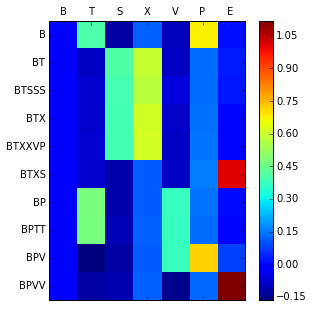

In [11]:
to_show = ['B', 'BT', 'BTSSS', 'BTX', 'BTXXVP', 'BTXS', 'BP', 'BPTT', 'BPV', 'BPVV']
reber_heatmap(to_show,False)

### Plotting the hidden layer

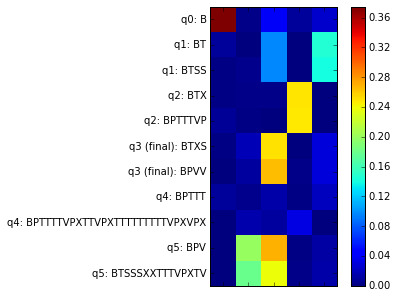

In [12]:
to_show = ['q0: B', 'q1: BT', 'q1: BTSS', 'q2: BTX', 'q2: BPTTTVP', 'q3 (final): BTXS', 'q3 (final): BPVV', 'q4: BPTTT', 'q4: BPTTTTVPXTTVPXTTTTTTTTTVPXVPX', 'q5: BPV', 'q5: BTSSSXXTTTVPXTV']
reber_heatmap(to_show)